In [15]:
import pandas as pd
import numpy as np

base_folder = '../../datalake/data_reference_2'
n_seeds = 10
seeds = [i+1 for i in range(n_seeds)]

experiments = ['standard', 'curriculum', 'continuos']
experiments_name = ['Standard Discrete', 'Paper Curriculum', 'Standard Continuous']

bestgfit_index = 2
bestgfit = {}
tests = []

for experiment in experiments:
    experiment_data = f"{base_folder}/data/{experiment}"
    bestgfit[experiment] = []
    tests_data = pd.read_csv(f'{experiment_data}/tests.csv', index_col=False)
    tests.append(list(tests_data.score))

    for seed in seeds:
        raw_stats = np.load(f"{experiment_data}/statS{seed}.npy")
        stats = [raw_stats[i] for i in range(bestgfit_index, len(raw_stats), 6)]
        bestgfit[experiment].append(stats[1:])


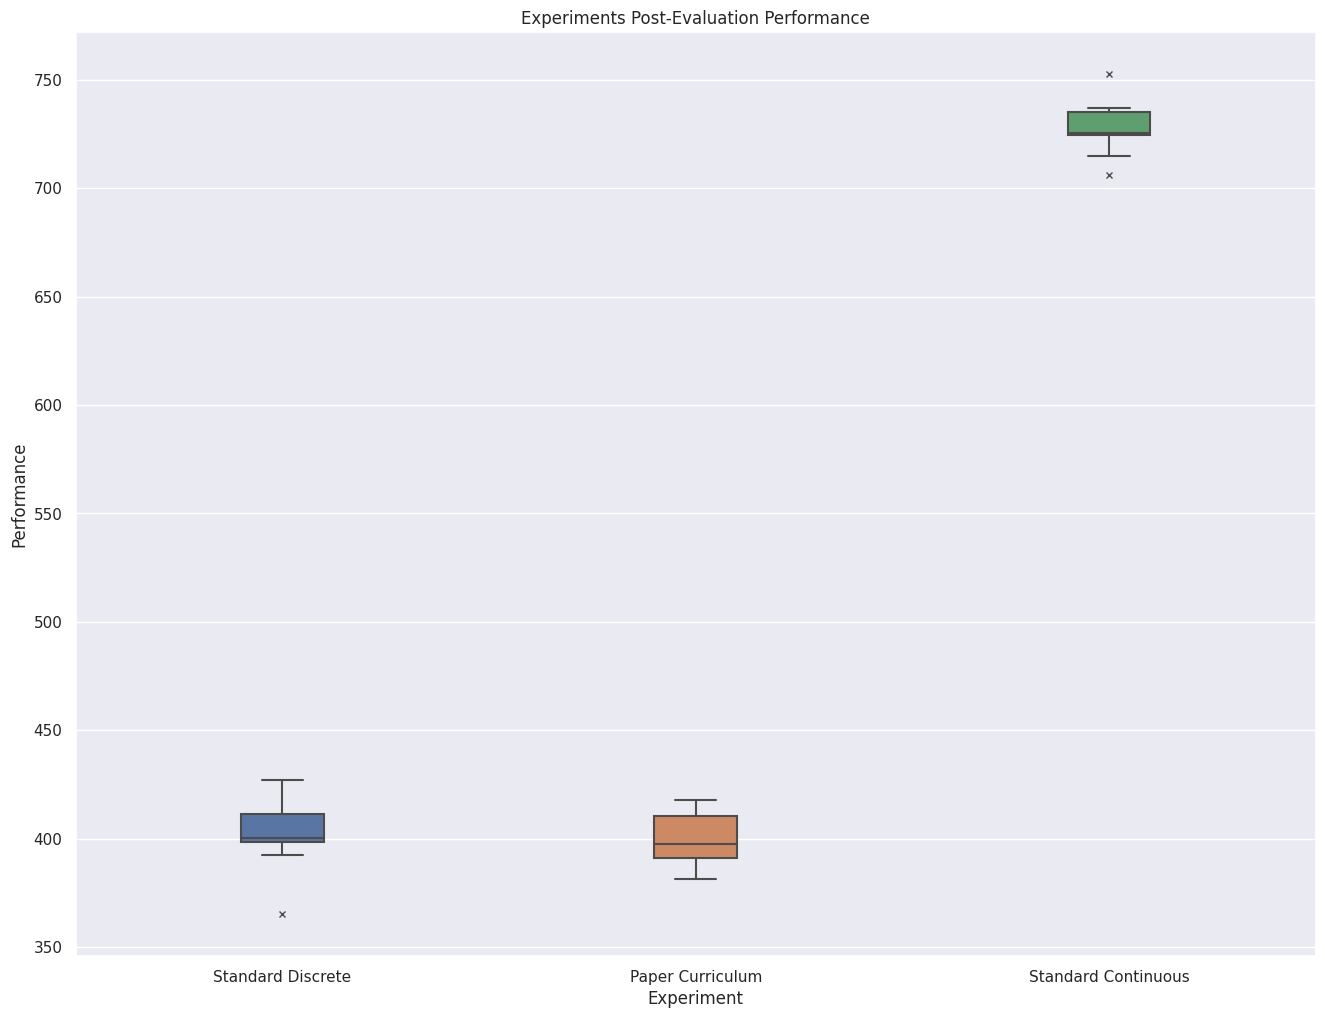

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(16,12)})

boxplot = sns.boxplot(tests, flierprops={"marker": "x"}, width=0.2)
boxplot.set_xticks([i for i in range(len(experiments_name))], experiments_name)
plt.title("Experiments Post-Evaluation Performance")
plt.ylabel("Performance")
plt.xlabel("Experiment")
plt.show()

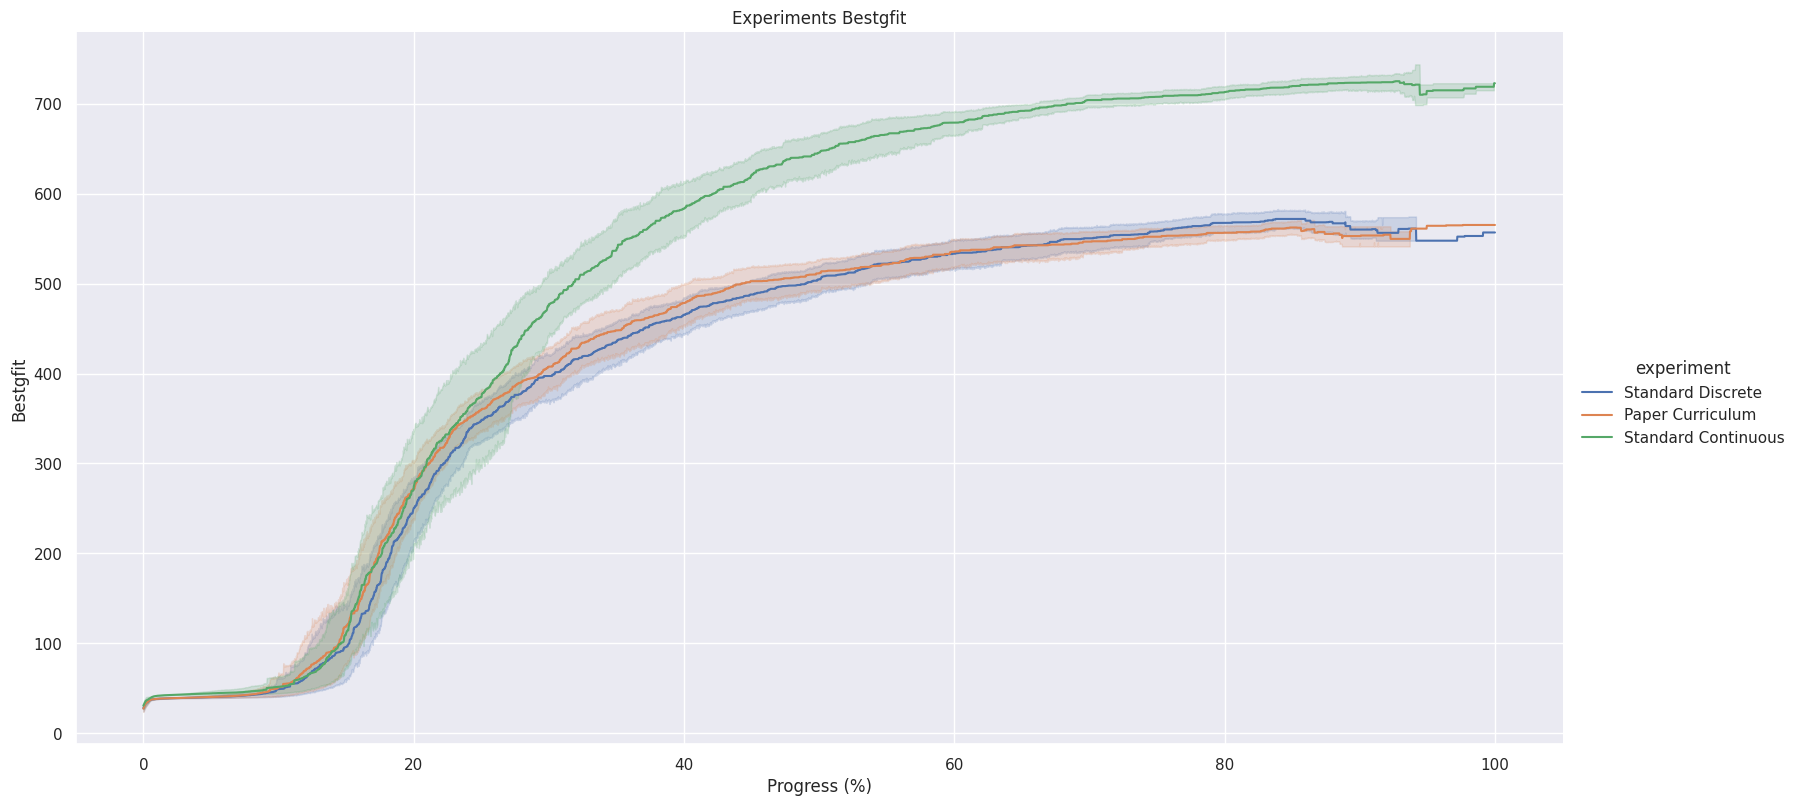

In [17]:
mean_stats = pd.DataFrame()

for i in range(len(experiments)):
    experiment = experiments[i]
    experiment_name = experiments_name[i]
    experiment_df = pd.DataFrame(bestgfit[experiment])
    experiment_df = experiment_df.T

    seeds_df = pd.DataFrame()
    for seed in seeds:
        index = seed-1
        seed_df = pd.DataFrame({'progress': [i*100/len(experiment_df[index]) for i in range(len(experiment_df[index]))], 'performance': experiment_df[index]})
        seed_df['seed'] = seed
        seeds_df = pd.concat([seeds_df, seed_df], ignore_index=True) if not seeds_df.empty else seed_df

    seeds_df['experiment'] = experiment_name
    mean_stats = pd.concat([mean_stats, seeds_df], ignore_index=True) if not mean_stats.empty else seeds_df

sns.relplot(mean_stats, x='progress', y='performance', hue='experiment', kind='line', estimator='mean', height=8, aspect=2)
plt.title("Experiments Bestgfit")
plt.ylabel("Bestgfit")
plt.xlabel("Progress (%)")
plt.show()